In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
result_2015 = pd.read_csv('Model_V2_2015.csv', index_col = 0)
result_2016 = pd.read_csv('Model_V2_2016.csv', index_col = 0)
result_2017 = pd.read_csv('Model_V2_2017.csv', index_col = 0)
result_2018 = pd.read_csv('Model_V2_2018.csv', index_col = 0)
result_2019 = pd.read_csv('Model_V2_2019.csv', index_col = 0)
result_2020 = pd.read_csv('Model_V2_2020.csv', index_col = 0)

In [3]:
result_2015.columns

Index(['up3', 'up5', 'up10', 'up14', 'up20', 'down3', 'down5', 'down10',
       'down14', 'down20', 'MACD', 'mom3', 'mom5', 'mom10', 'mom14', 'mom20',
       'std3', 'std5', 'std10', 'std14', 'std20', 'vol_sig'],
      dtype='object')

### From 3D to 2D (Across historical trading volumes)  
Our data is in form of Year * Decile on volume traded * Variables.  
One way to visualize it is to reduce from 3D to 2D by eliminating the year variable to plot data on 2-axes.

In [16]:
up3 = result_2015['up3'] + result_2016['up3'] + result_2017['up3'] + result_2018['up3'] + result_2019['up3']
up5 = result_2015['up5'] + result_2016['up5'] + result_2017['up5'] + result_2018['up5'] + result_2019['up5']
up10 = result_2015['up10'] + result_2016['up10'] + result_2017['up10'] + result_2018['up10'] + result_2019['up10']
up14 = result_2015['up14'] + result_2016['up14'] + result_2017['up14'] + result_2018['up14'] + result_2019['up14']
up20 = result_2015['up20'] + result_2016['up20'] + result_2017['up20'] + result_2018['up20'] + result_2019['up20']

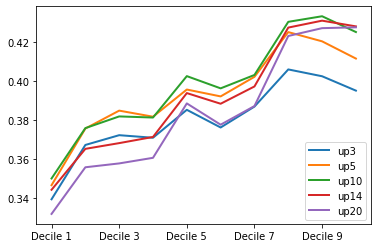

In [18]:
# Stocks with higher volume traded historically will have higher proportion of upward trend.

fig, ax = plt.subplots()
l1 = ax.plot(up3/5, linewidth = 2)
l2 = ax.plot(up5/5, linewidth = 2)
l3 = ax.plot(up10/5, linewidth = 2)
l4 = ax.plot(up14/5, linewidth = 2)
l5 = ax.plot(up20/5, linewidth = 2)
IDX = [0, 2, 4, 6, 8]
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))
plt.legend((l1[0], l2[0], l3[0], l4[0], l5[0]), ('up3', 'up5', 'up10', 'up14', 'up20'), bbox_to_anchor=(1, 0.4))

In [20]:
down3 = result_2015['down3'] + result_2016['down3'] + result_2017['down3'] + result_2018['down3'] + result_2019['down3']
down5 = result_2015['down5'] + result_2016['down5'] + result_2017['down5'] + result_2018['down5'] + result_2019['down5']
down10 = result_2015['down10'] + result_2016['down10'] + result_2017['down10'] + result_2018['down10'] + result_2019['down10']
down14 = result_2015['down14'] + result_2016['down14'] + result_2017['down14'] + result_2018['down14'] + result_2019['down14']
down20 = result_2015['down20'] + result_2016['down20'] + result_2017['down20'] + result_2018['down20'] + result_2019['down20']

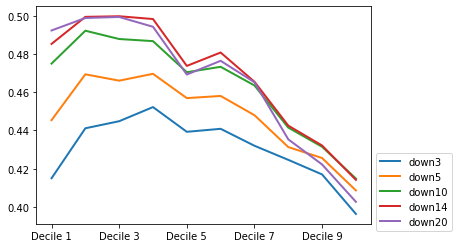

In [26]:
# Stocks with high volume traded historically usually have lower proportion of downward trend.
fig, ax = plt.subplots()
l1 = ax.plot(down3/5, linewidth = 2)
l2 = ax.plot(down5/5, linewidth = 2)
l3 = ax.plot(down10/5, linewidth = 2)
l4 = ax.plot(down14/5, linewidth = 2)
l5 = ax.plot(down20/5, linewidth = 2)
IDX = [0, 2, 4, 6, 8]
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))
plt.legend((l1[0], l2[0], l3[0], l4[0], l5[0]), ('down3', 'down5', 'down10', 'down14', 'down20'), bbox_to_anchor=(1, 0.35))

In [22]:
MACD = result_2015['MACD'] + result_2016['MACD'] + result_2017['MACD'] + result_2018['MACD'] + result_2019['MACD']

([<matplotlib.axis.XTick at 0x25af1550448>,
 <a list of 5 Text xticklabel objects>)

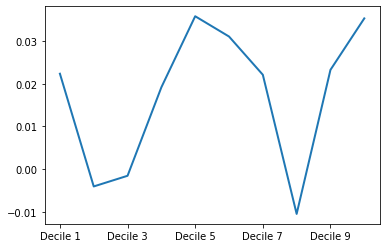

In [24]:
# No patterns found here
fig, ax = plt.subplots()
l1 = ax.plot(MACD/5, linewidth = 2)
IDX = [0, 2, 4, 6, 8]
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))

In [25]:
mom3 = result_2015['mom3'] + result_2016['mom3'] + result_2017['mom3'] + result_2018['mom3'] + result_2019['mom3']
mom5 = result_2015['mom5'] + result_2016['mom5'] + result_2017['mom5'] + result_2018['mom5'] + result_2019['mom5']
mom10 = result_2015['mom10'] + result_2016['mom10'] + result_2017['mom10'] + result_2018['mom10'] + result_2019['mom10']
mom14 = result_2015['mom14'] + result_2016['mom14'] + result_2017['mom14'] + result_2018['mom14'] + result_2019['mom14']
mom20 = result_2015['mom20'] + result_2016['mom20'] + result_2017['mom20'] + result_2018['mom20'] + result_2019['mom20']

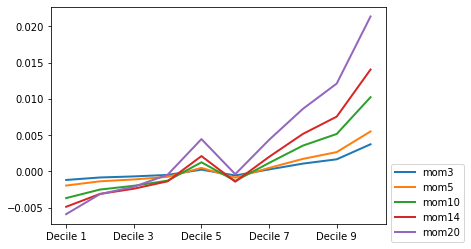

In [28]:
# Stocks with high volume traded usually have higher % of return, 
# but this pattern is evident only among stocks that have higher volume traded than median one.
fig, ax = plt.subplots()
l1 = ax.plot(mom3/5, linewidth = 2)
l2 = ax.plot(mom5/5, linewidth = 2)
l3 = ax.plot(mom10/5, linewidth = 2)
l4 = ax.plot(mom14/5, linewidth = 2)
l5 = ax.plot(mom20/5, linewidth = 2)
IDX = [0, 2, 4, 6, 8]
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))
plt.legend((l1[0], l2[0], l3[0], l4[0], l5[0]), ('mom3', 'mom5', 'mom10', 'mom14', 'mom20'), bbox_to_anchor=(1.25, 0.3))

In [4]:
std3 = result_2015['std3'] + result_2016['std3'] + result_2017['std3'] + result_2018['std3'] + result_2019['std3']
std5 = result_2015['std5'] + result_2016['std5'] + result_2017['std5'] + result_2018['std5'] + result_2019['std5']
std10 = result_2015['std10'] + result_2016['std10'] + result_2017['std10'] + result_2018['std10'] + result_2019['std10']
std14 = result_2015['std14'] + result_2016['std14'] + result_2017['std14'] + result_2018['std14'] + result_2019['std14']
std20 = result_2015['std20'] + result_2016['std20'] + result_2017['std20'] + result_2018['std20'] + result_2019['std20']

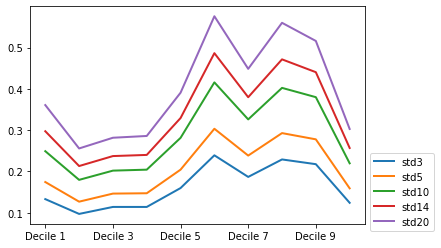

In [30]:
# This is like inverted U-shape. For stocks with low volume traded, the higher the volume, the more volatility you could expect. 
# However, this patterns disappear, even the opposite, on stocks traded higher than median.
fig, ax = plt.subplots()
l1 = ax.plot(std3/5, linewidth = 2)
l2 = ax.plot(std5/5, linewidth = 2)
l3 = ax.plot(std10/5, linewidth = 2)
l4 = ax.plot(std14/5, linewidth = 2)
l5 = ax.plot(std20/5, linewidth = 2)
IDX = [0, 2, 4, 6, 8]
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))
plt.legend((l1[0], l2[0], l3[0], l4[0], l5[0]), ('std3', 'std5', 'std10', 'std14', 'std20'), bbox_to_anchor=(1, 0.35))

([<matplotlib.axis.XTick at 0x25af2791908>,
 <a list of 5 Text xticklabel objects>)

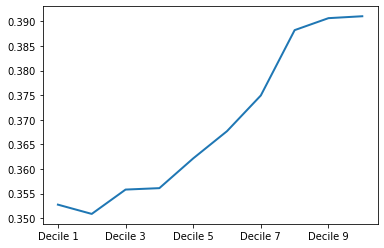

In [31]:
# Vol signal is higher on stocks with more volume traded.
vol_sig = result_2015['vol_sig'] + result_2016['vol_sig'] + result_2017['vol_sig'] + result_2018['vol_sig'] + result_2019['vol_sig']
fig, ax = plt.subplots()
l1 = ax.plot(vol_sig/5, linewidth = 2)
IDX = [0, 2, 4, 6, 8]
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))

### From 3D to 2D (Across year)  
Our data is in form of Year * Decile on volume traded * Variables.  
One way to visualize it is to reduce from 3D to 2D by eliminating the trading volume variable to plot data on 2-axes.

In [7]:
col_names = result_2015.columns
TS_data = {}
for col in col_names:
    TS_data[col] = [result_2015[col].mean(), result_2016[col].mean(), result_2017[col].mean(), result_2018[col].mean(), result_2019[col].mean(), result_2020[col].mean()]

In [8]:
TS_data.keys()

dict_keys(['up3', 'up5', 'up10', 'up14', 'up20', 'down3', 'down5', 'down10', 'down14', 'down20', 'MACD', 'mom3', 'mom5', 'mom10', 'mom14', 'mom20', 'std3', 'std5', 'std10', 'std14', 'std20', 'vol_sig'])

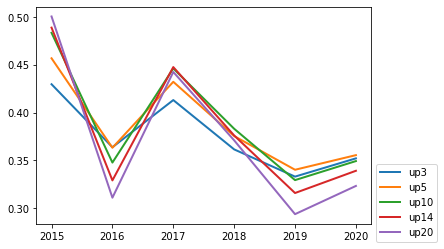

In [10]:
# Notice that the longer the horizon, the proportion of upward prediction is less.
# However, the proportion of upward prediction among individual stocks is higher than in 2019.
fig, ax = plt.subplots()
l1 = ax.plot(TS_data['up3'], linewidth = 2)
l2 = ax.plot(TS_data['up5'], linewidth = 2)
l3 = ax.plot(TS_data['up10'], linewidth = 2)
l4 = ax.plot(TS_data['up14'], linewidth = 2)
l5 = ax.plot(TS_data['up20'], linewidth = 2)
IDX = [0, 1, 2, 3, 4, 5]
plt.xticks(IDX, ('2015', '2016', '2017', '2018', '2019', '2020'))
plt.legend((l1[0], l2[0], l3[0], l4[0], l5[0]), ('up3', 'up5', 'up10', 'up14', 'up20'), bbox_to_anchor=(1, 0.3))

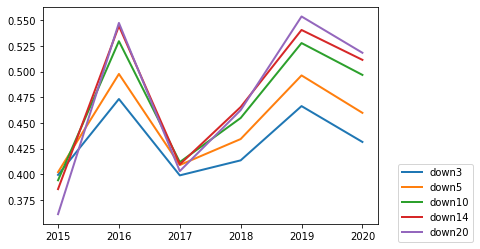

In [32]:
# Notice that the longer the horizon, the proportion of upward prediction is higher.
# However, the proportion of upward prediction among individual stocks is still lower than in 2019.
fig, ax = plt.subplots()
l1 = ax.plot(TS_data['down3'], linewidth = 2)
l2 = ax.plot(TS_data['down5'], linewidth = 2)
l3 = ax.plot(TS_data['down10'], linewidth = 2)
l4 = ax.plot(TS_data['down14'], linewidth = 2)
l5 = ax.plot(TS_data['down20'], linewidth = 2)
IDX = [0, 1, 2, 3, 4, 5]
plt.xticks(IDX, ('2015', '2016', '2017', '2018', '2019', '2020'))
plt.legend((l1[0], l2[0], l3[0], l4[0], l5[0]), ('down3', 'down5', 'down10', 'down14', 'down20'), bbox_to_anchor=(1.3, 0.3))

([<matplotlib.axis.XTick at 0x25af10d62c8>,
 <a list of 6 Text xticklabel objects>)

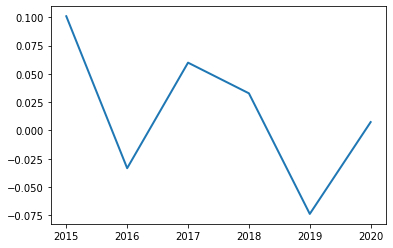

In [13]:
# MACD shows the difference between short-term and long-term EMA. 
# This shows better picture compared to 2019.
# However, looking in absolute term, MACD is around 0 in 2020, meaning that the amount that short-term exceeds long-term and vice versa offset each other.
fig, ax = plt.subplots()
l1 = ax.plot(TS_data['MACD'], linewidth = 2)
IDX = [0, 1, 2, 3, 4, 5]
plt.xticks(IDX, ('2015', '2016', '2017', '2018', '2019', '2020'))

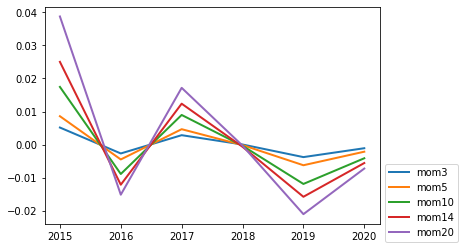

In [33]:
# The longer investment horizon, the less percentage return we expected to get!
# Momentum slightly increased from 2019 to 2020, meaning that the average percentage of return is higher than before Covid!
fig, ax = plt.subplots()
l1 = ax.plot(TS_data['mom3'], linewidth = 2)
l2 = ax.plot(TS_data['mom5'], linewidth = 2)
l3 = ax.plot(TS_data['mom10'], linewidth = 2)
l4 = ax.plot(TS_data['mom14'], linewidth = 2)
l5 = ax.plot(TS_data['mom20'], linewidth = 2)
IDX = [0, 1, 2, 3, 4, 5]
plt.xticks(IDX, ('2015', '2016', '2017', '2018', '2019', '2020'))
plt.legend((l1[0], l2[0], l3[0], l4[0], l5[0]), ('mom3', 'mom5', 'mom10', 'mom14', 'mom20'), bbox_to_anchor=(1, 0.3))

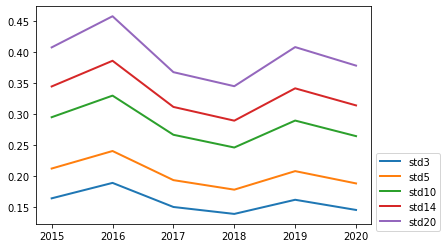

In [34]:
# The longer investment horizon, the higher STD we expect to get.
# STD slightly decreased, meaning that individual stock volatility, on average, decreased slightly.
fig, ax = plt.subplots()
l1 = ax.plot(TS_data['std3'], linewidth = 2)
l2 = ax.plot(TS_data['std5'], linewidth = 2)
l3 = ax.plot(TS_data['std10'], linewidth = 2)
l4 = ax.plot(TS_data['std14'], linewidth = 2)
l5 = ax.plot(TS_data['std20'], linewidth = 2)
IDX = [0, 1, 2, 3, 4, 5]
plt.xticks(IDX, ('2015', '2016', '2017', '2018', '2019', '2020'))
plt.legend((l1[0], l2[0], l3[0], l4[0], l5[0]), ('std3', 'std5', 'std10', 'std14', 'std20'), bbox_to_anchor=(1, 0.35))

([<matplotlib.axis.XTick at 0x25af11c9e08>,
 <a list of 6 Text xticklabel objects>)

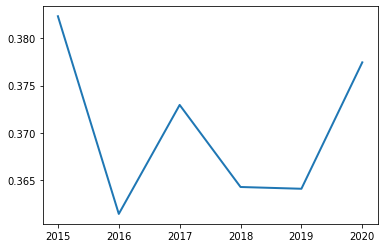

In [15]:
# Vol signal is stronger in 2020.
fig, ax = plt.subplots()
l1 = ax.plot(TS_data['vol_sig'], linewidth = 2)
IDX = [0, 1, 2, 3, 4, 5]
plt.xticks(IDX, ('2015', '2016', '2017', '2018', '2019', '2020'))